In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time


labels = {0:'০', 1:'১', 2:'২', 3:'৩', 4:'৪', 5:'৫', 6:'৬', 7:'৭', 8:'৮', 9:'৯'}
number_path = '/kaggle/input/bangla-digit-scene-text'

IMG_SIZE = 28
IMAGE_CHANNELS = 1
training_data = []

for f in os.listdir(number_path):
    path = os.path.join(number_path, f)
    for g in os.listdir(path):
        try:
            img_path = os.path.join(path, g)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))/255.0
            training_data.append([img, f])

        except Exception as e:
            pass
            

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

In [2]:
import random

random.shuffle(training_data)

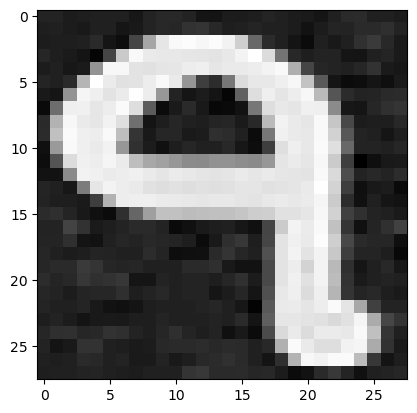

In [3]:
for i in training_data:
    plt.imshow(i[0], cmap = 'gray')
    plt.show()
    break

In [4]:
x_train = []
y_train = []

x_test = []
y_test = []

c = 0
for i in training_data:
    if c < len(training_data) * .80:
        x_train.append(i[0])
        y_train.append(i[1])
    else:
        x_test.append(i[0])
        y_test.append(i[1])
    
    c += 1


x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)   

In [5]:
from tensorflow.keras.utils import to_categorical

trainX = x_train
trainY = y_train

testX = x_test
testY = y_test

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              4

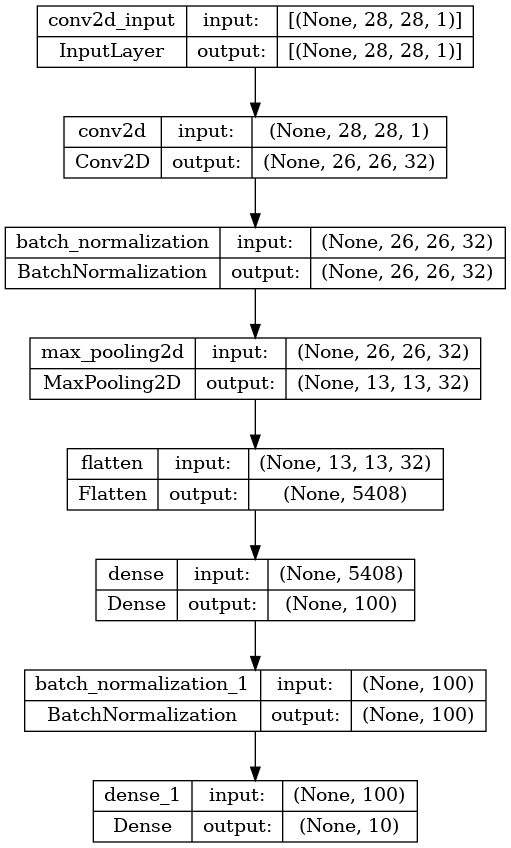

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
history = model.fit(trainX, trainY, epochs=20, batch_size=16, validation_data=(testX, testY), verbose=0)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 75.000


In [10]:
model.save("Digit-Cnn.model")

In [11]:
prediction = model.predict(x_test)

3/3 [==============================] - 0s 7ms/step


Label: 5
Prediction: ০


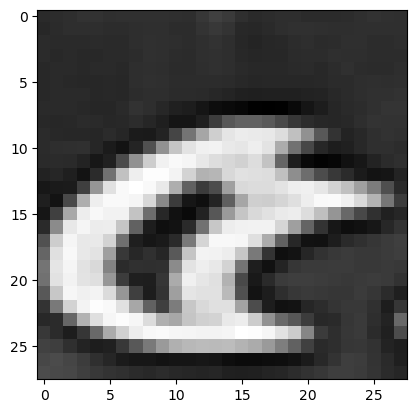

In [12]:
print("Label:", y_test[0])
print("Prediction:", labels[np.argmax(prediction[0])])
plt.imshow(x_test[0], cmap="gray")
plt.show()

Label: 7
Prediction: ৭


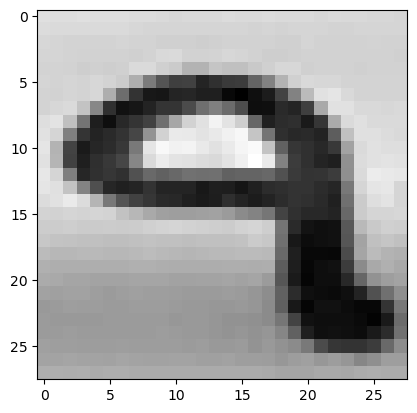

In [13]:
print("Label:", y_test[11])
print("Prediction:", labels[np.argmax(prediction[11])])
plt.imshow(x_test[11], cmap="gray")
plt.show()